In [112]:

# With the goal above, I will import just what I need. 
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score
from string import letters
from sklearn.metrics import confusion_matrix
import numpy as np



import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
df=pd.read_csv("D:\UIS-LEARN\Spring 2016/RedditShortDemoSurvey-1-Cleaned.csv")

df.head()

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df.describe()

,Entry Id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


	Entry Id

In [114]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


#EDA for the data

In [115]:
df = df.rename(columns={'Please indicate your gender.':'Gender','Please select the category that includes your age.' :'Age','Are you or have you ever been in military service?':'Militarystatus','Do you currently have children under the age of 18 living in your household?':'Children','What best describes your level of education?':'Education','Treated country data':'Country',
'Which one of the following ranges includes your total yearly household income before taxes?':'Incomewithouttaxes','treated subreddit data':'Subredditdata','Are you a dog or a cat person?':'Petperson','If you were a cheese, what cheese would you be?':'Cheeseyouchoose','What is your marital status?': 'Maritalstatus', 'What best describes your employment status?': 'Employementstatus','(For U. S. redditors) In which state do you live?':'USstateulive'
                       })

In [116]:
X = df.groupby('Country')

In [117]:
X['Incomewithouttaxes'].describe()

Country                                 
 Canada                           count                       4
                                  unique                      3
                                  top         $50,000 - $69,999
                                  freq                        2
 Canada eh                        count                       1
                                  unique                      1
                                  top         $50,000 - $69,999
                                  freq                        1
 United Kingdom                   count                       2
                                  unique                      2
                                  top             Under $20,000
                                  freq                        1
/                                 count                       1
                                  unique                      1
                                  top                      none

In [118]:
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

This is categorical Variable

2.  Are there missing values?

In [119]:
df[df.Gender.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


No Missing Values in Gender

In [120]:
df.Gender.describe()

count     32754
unique        3
top        Male
freq      26418
Name: Gender, dtype: object

4. Histograms describing the distribution of the variable.

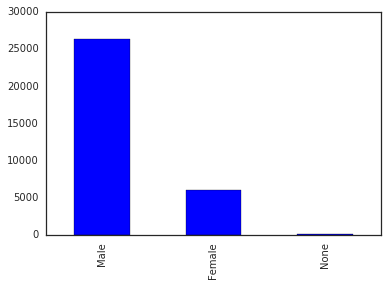

In [121]:
df['Gender'].value_counts().plot(kind='bar')

#'Please select the category that includes your age.' :'Age'

In [122]:
df.Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

2.  Are there missing values?

In [123]:
df[df.Age.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


==>No missing values<==

4. Histograms describing the distribution of the variable.

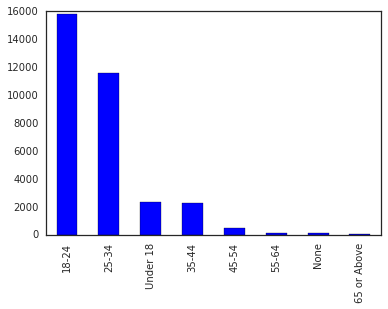

In [124]:
df['Age'].value_counts().plot(kind='bar')

MaritalStatus

In [125]:
df.Maritalstatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Maritalstatus, dtype: int64

In [126]:
df[df.Maritalstatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


Histograms describing the distribution of the variable.

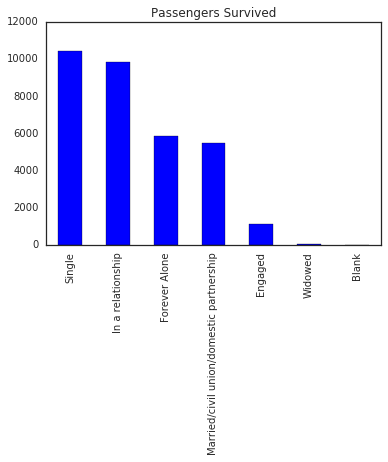

In [127]:
df['Maritalstatus'].value_counts().plot(kind='bar',title="Passengers Survived")

#EmploymentStatus

In [128]:
df.Employementstatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Employementstatus, dtype: int64

In [129]:
df[df.Employementstatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


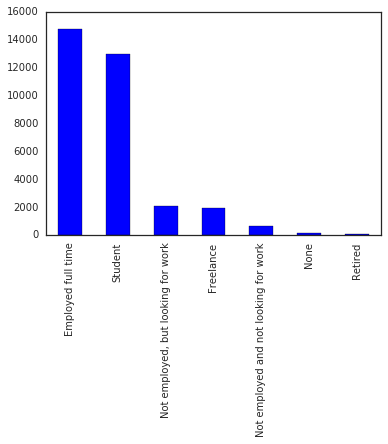

In [130]:
df['Employementstatus'].value_counts().plot(kind='bar')

#Militarystatus

In [131]:
df[df.Militarystatus.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [132]:
df.Militarystatus.value_counts()

No      30526
Yes      2223
none        5
Name: Militarystatus, dtype: int64

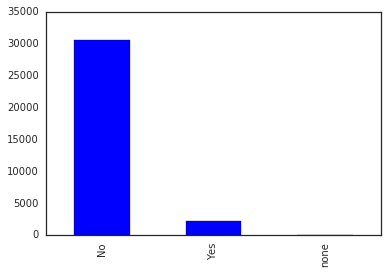

In [133]:
df['Militarystatus'].value_counts().plot(kind='bar')

In [134]:
#Children

In [135]:
df[df.Children.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [136]:
df.Children.value_counts()

No      27488
Yes      5047
None      219
Name: Children, dtype: int64

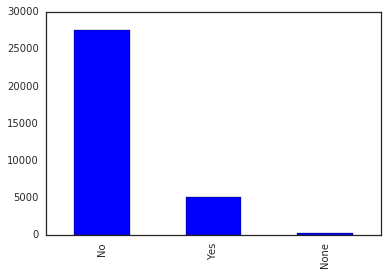

In [137]:
df['Children'].value_counts().plot(kind='bar')

In [138]:
#Education

In [139]:
df[df.Education.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [140]:
df.Education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

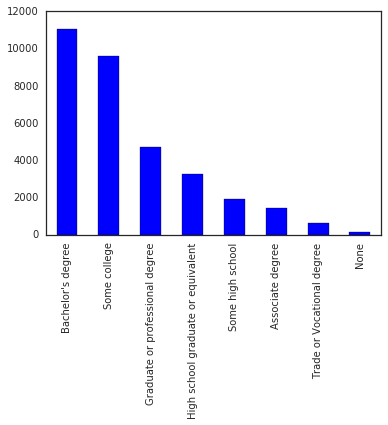

In [141]:
df['Education'].value_counts().plot(kind='bar')

In [142]:
#Country

In [143]:
df[df.Country.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [144]:
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

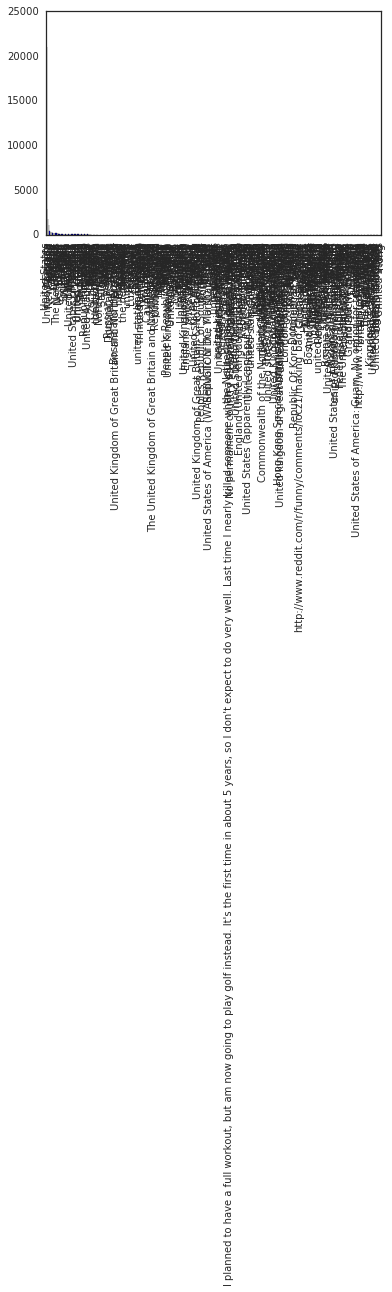

In [145]:
df['Country'].value_counts().plot(kind='bar')

In [146]:
#(For U. S. redditors) In which state do you live?:USstateulive

In [147]:
df[df.USstateulive.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
17,18,Male,35-44,Single,Not employed and not looking for work,No,No,Graduate or professional degree,United Kingdom,NaN,"Under $20,000",aww,I like cats.,Goat,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Male,25-34,Single,Employed full time,No,No,Graduate or professional degree,Republic of Ireland,NaN,"$40,000 - $49,999",askscience,I like cats.,Feta,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Male,45-54,Married/civil union/domestic partnership,Freelance,No,Yes,High school graduate or equivalent,France,NaN,"Under $20,000",motorcycles,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
21,22,Male,Under 18,Forever Alone,Student,No,Yes,High school graduate or equivalent,United Kingdom,NaN,"$100,000 - $149,999",anarchism,I like turtles.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
22,23,Male,18-24,Single,Employed full time,No,No,High school graduate or equivalent,Germany,NaN,"$100,000 - $149,999",truereddit,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
23,24,Male,55-64,Forever Alone,Employed full time,Yes,No,Trade or Vocational degree,Canada,NaN,"$40,000 - $49,999",atheism,I like cats.,Feta,NaN,NaN,NaN,NaN,NaN,NaN
24,25,Male,45-54,Married/civil union/domestic partnership,Freelance,No,No,Some college,Germany,NaN,"$150,000 or more",new,I like turtles.,Other,NaN,NaN,NaN,NaN,NaN,NaN


There are 11908 records for which US state is missing

In [148]:
df.USstateulive.value_counts()

California        3401
Texas             1541
New York          1418
Illinois           976
Washington         910
Florida            882
Pennsylvania       823
Massachusetts      796
Virginia           729
Ohio               654
New Jersey         552
Michigan           545
North Carolina     511
Maryland           508
Georgia            501
Oregon             466
Minnesota          464
Wisconsin          415
Colorado           410
Arizona            364
Missouri           340
Indiana            313
Connecticut        303
Tennessee          292
Louisiana          196
Utah               181
Kansas             174
Iowa               170
South Carolina     169
Kentucky           168
Alabama            166
Oklahoma           150
Nebraska           118
New Hampshire      111
Nevada             110
Arkansas            99
Washington, DC      98
Maine               85
New Mexico          83
Idaho               78
Alaska              75
Vermont             74
Rhode Island        72
Hawaii     

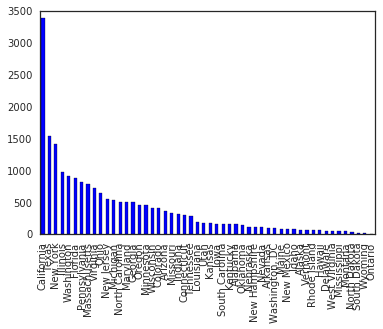

In [149]:
df['USstateulive'].value_counts().plot(kind='bar')

In [150]:
#Incomewithouttaxes

In [151]:
df[df.Incomewithouttaxes.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [152]:
df.Incomewithouttaxes.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Incomewithouttaxes, dtype: int64

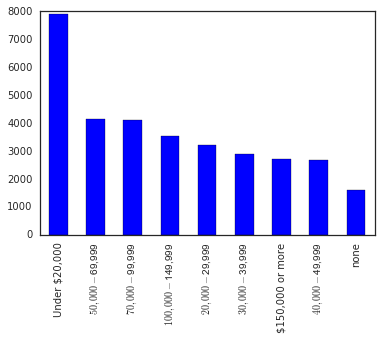

In [153]:
df['Incomewithouttaxes'].value_counts().plot(kind='bar')

In [154]:
#Subredditdata

In [155]:
df[df.Subredditdata.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,Minnesota,none,NaN,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,Texas,"$70,000 - $99,999",NaN,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,NaN,"$20,000 - $29,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,NaN,"$70,000 - $99,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,Texas,"$40,000 - $49,999",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
89,90,Male,18-24,Single,Student,No,No,Some college,United States,Colorado,"$150,000 or more",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,Massachusetts,"$20,000 - $29,999",NaN,I like dogs.,Goat,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,Florida,"Under $20,000",NaN,I like turtles.,Goat,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df.Subredditdata.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

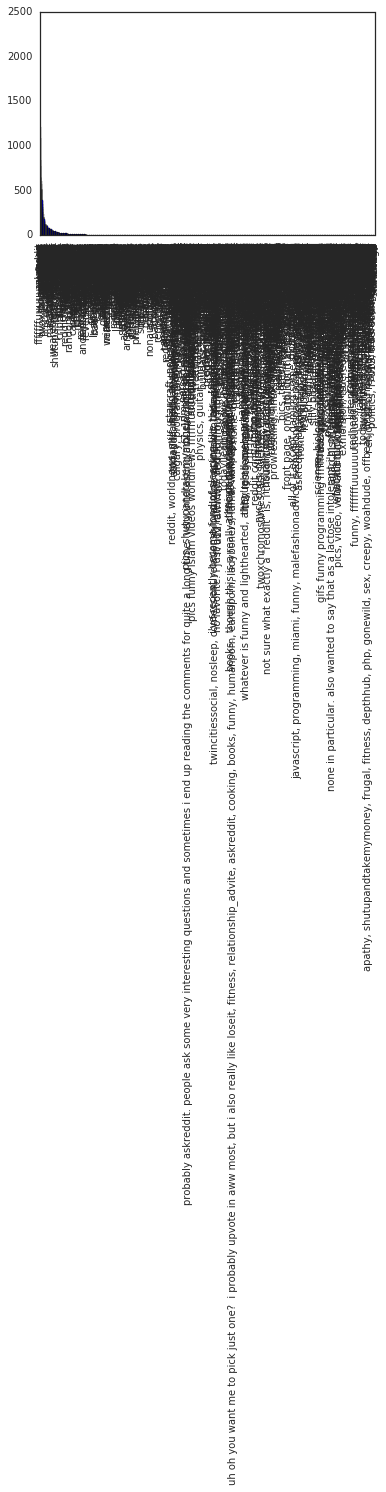

In [157]:
df['Subredditdata'].value_counts().plot(kind='bar')

In [158]:
#Petperson

In [159]:
df[df.Petperson.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,NaN,none,DROP TABLE `users`,NaN,1,7/13/11 15:47,public,NaN,NaN,NaN,NaN
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,NaN,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),7/14/11 12:12,public,NaN,NaN,NaN,NaN


There are two missing values in PetPerson

In [160]:
df.Petperson.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: Petperson, dtype: int64

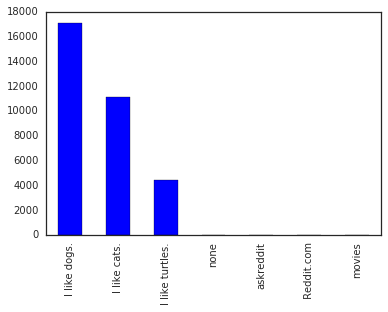

In [161]:
df['Petperson'].value_counts().plot(kind='bar')

In [162]:
#Cheeseyouchoose

In [163]:
df[df.Cheeseyouchoose.isnull()]

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,USstateulive,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


In [164]:
df.Cheeseyouchoose.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheeseyouchoose, dtype: int64

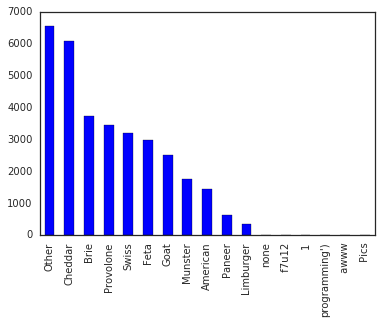

In [165]:
df['Cheeseyouchoose'].value_counts().plot(kind='bar')

In [166]:
#Cleaning Data

Drop US States

In [167]:
del df['USstateulive']

In [168]:
df


,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


Deleting unnamed columns from the dataset

In [169]:
del df['Unnamed: 14']

In [170]:
del df['Unnamed: 18']

In [171]:
del df['Unnamed: 15']

In [172]:
del df['Unnamed: 16']

In [173]:
del df['Unnamed: 17']

In [174]:
del df['Unnamed: 19']

#Handling Missing values,here we simply filling the missing values with most frequent value

In [175]:
df["Subredditdata"].fillna('askreddit', inplace=True)


In [176]:

df["Petperson"].fillna('I like dogs.', inplace=True)


In [177]:
df

,Entry Id,Gender,Age,Maritalstatus,Employementstatus,Militarystatus,Children,Education,Country,Incomewithouttaxes,Subredditdata,Petperson,Cheeseyouchoose
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",askreddit,I like cats.,Munster


Removing bad data

In [178]:
df['Petperson'].describe()

count            32754
unique               7
top       I like dogs.
freq             17151
Name: Petperson, dtype: object

In [179]:
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [180]:
Country1=df['Country'][0:] 

In [ ]:
Country1

In [ ]:
df

In [ ]:
lg2=Country1.str.rstrip(': Guam. No option for territories :( ')

In [ ]:
lg3=lg2.str.rstrip('(Guam) ')

In [ ]:
lg4=lg3.str.replace('United States of American','United States of America')

In [ ]:
lg5=lg4.str.replace('United States','United States of America')

In [ ]:
lg6=lg5.str.replace('usa','United States of America')

In [ ]:
df['Country'] =lg6

In [181]:

df=df[df['Country'] !='http://www.tf2items.com/id/fnoot']

In [182]:
 df=df[df['Petperson'] !='movies']

In [183]:

df=df[df['Petperson'] !=' Reddit.com']

In [184]:


df=df[df['Petperson'] !='askreddit']

In [185]:
df.Petperson.value_counts()

I like dogs.       17151
I like cats.       11151
I like turtles.     4442
none                   5
Name: Petperson, dtype: int64

In [ ]:
 #df=df[df['Militarystatus'] !='none']

In [ ]:
#df.Militarystatus=df.Militarystatus.replace('Yes', '1')

In [ ]:
#df.Militarystatus=df.Militarystatus.replace('No', '0')

In [ ]:
#df['Militarystatus'].replace(to_replace='No', value=0)

In [186]:

df.Gender.value_counts()

Male      26415
Female     6133
None        201
Name: Gender, dtype: int64

==>Create indicator variables for categoricals, bin where you feel appropriate

In [187]:
X = pd.DataFrame()
X['Gender'] = df['Gender']
X['Age'] = df['Age']
X['Maritalstatus']=df['Maritalstatus']
X['Employmentstatus']=df['Employementstatus']
X['Country']=df['Country']
X['Education']=df['Education']
X['Incomewithouttaxes']=df['Incomewithouttaxes']
X['Children']=df['Children']
X['Militarystatus'] = df['Militarystatus']

In [188]:
X

,Gender,Age,Maritalstatus,Employmentstatus,Country,Education,Incomewithouttaxes,Children,Militarystatus
0,Male,25-34,Blank,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,none
1,Male,25-34,Blank,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,none
2,Female,18-24,Blank,Freelance,United States,Some college,"Under $20,000",No,none
3,Male,25-34,Blank,Freelance,United States,Bachelor's degree,"$150,000 or more",No,none
4,Female,25-34,Blank,Employed full time,United States,Bachelor's degree,"$70,000 - $99,999",No,none
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,No
6,Male,25-34,In a relationship,Employed full time,Germany,Some college,none,No,No
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",United States,Bachelor's degree,"$70,000 - $99,999",No,No
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,United States,Bachelor's degree,"$150,000 or more",No,No
9,Male,25-34,In a relationship,Freelance,Germany,Some college,"$70,000 - $99,999",No,No


In [189]:
y = X['Militarystatus']
X = X.drop(['Militarystatus'], axis=1)

In [190]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [191]:
describe_categorical(X)

,Gender,Age,Maritalstatus,Employmentstatus,Country,Education,Incomewithouttaxes,Children
count,32749,32749,32749,32749,32749,32749,32749,32749
unique,3,8,7,7,439,8,9,3
top,Male,18-24,Single,Employed full time,United States,Bachelor's degree,"Under $20,000",No
freq,26415,15800,10428,14813,20964,11045,7889,27483


In [192]:
#categorical_variables = ['Gender','Age', 'Maritalstatus','Employementstatus','Militarystatus','Children'
#'Education','Country','Incomewithouttaxes','Subredditdata','Petperson','Cheeseyouchoose']
  
categorical_variables = ['Gender','Age', 'Maritalstatus','Employmentstatus','Children',
'Education','Country','Incomewithouttaxes']


In [193]:
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [194]:
y

0        none
1        none
2        none
3        none
4        none
5          No
6          No
7          No
8          No
9          No
10         No
11         No
12         No
13         No
14         No
15         No
16         No
17         No
18         No
19         No
20         No
21         No
22         No
23        Yes
24         No
25         No
26         No
27         No
28         No
29         No
         ... 
32724      No
32725      No
32726      No
32727      No
32728      No
32729      No
32730      No
32731      No
32732      No
32733      No
32734     Yes
32735      No
32736     Yes
32737     Yes
32738      No
32739      No
32740      No
32741     Yes
32742      No
32743      No
32744      No
32745      No
32746      No
32747      No
32748     Yes
32749      No
32750      No
32751      No
32752      No
32753      No
Name: Militarystatus, dtype: object

In [195]:
y.value_counts()

No      30521
Yes      2223
none        5
Name: Militarystatus, dtype: int64

==> Pearson's Correlation Coefficient, determine which variables are most highly collinear

In [93]:
X.corr(method='pearson', min_periods=1)

,Gender_Female,Gender_Male,Gender_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,...,Country_wales,"Incomewithouttaxes_$100,000 - $149,999","Incomewithouttaxes_$150,000 or more","Incomewithouttaxes_$20,000 - $29,999","Incomewithouttaxes_$30,000 - $39,999","Incomewithouttaxes_$40,000 - $49,999","Incomewithouttaxes_$50,000 - $69,999","Incomewithouttaxes_$70,000 - $99,999","Incomewithouttaxes_Under $20,000",Incomewithouttaxes_none
Gender_Female,1.000000,-0.980283,-0.037721,0.047644,-0.032653,-0.027342,0.009551,0.010536,0.017871,-0.008285,...,-0.003751,-0.022625,-0.028107,0.011489,0.024828,0.000339,-0.018808,-0.026718,0.051697,-0.013171
Gender_Male,-0.980283,1.000000,-0.160481,-0.040103,0.031773,0.027266,-0.008754,-0.009389,-0.020601,-0.067174,...,0.003827,0.022751,0.028195,-0.008571,-0.024028,-0.001890,0.017264,0.028299,-0.049179,0.004766
Gender_None,-0.037721,-0.160481,1.000000,-0.035185,0.002426,-0.001306,-0.003440,-0.005149,0.014918,0.381091,...,-0.000614,-0.002039,-0.002191,-0.014046,-0.002507,0.007868,0.006641,-0.009650,-0.009530,0.041689
Age_18-24,0.047644,-0.040103,-0.035185,1.000000,-0.713779,-0.262607,-0.120460,-0.063260,-0.041363,-0.050115,...,0.000275,-0.101416,-0.024501,0.039540,-0.020424,-0.048191,-0.080874,-0.132101,0.261568,0.019150
Age_25-34,-0.032653,0.031773,0.002426,-0.713779,1.000000,-0.201086,-0.092240,-0.048440,-0.031673,-0.038374,...,-0.005778,0.022332,-0.068204,0.020632,0.062627,0.077792,0.092481,0.107245,-0.189304,-0.086364
Age_35-44,-0.027342,0.027266,-0.001306,-0.262607,-0.201086,1.000000,-0.033936,-0.017822,-0.011653,-0.014118,...,0.013303,0.106394,0.091411,-0.050652,-0.030555,-0.015802,0.015020,0.055917,-0.117709,-0.014617
Age_45-54,0.009551,-0.008754,-0.003440,-0.120460,-0.092240,-0.033936,1.000000,-0.008175,-0.005345,-0.006476,...,-0.000975,0.051356,0.048559,-0.023537,-0.011815,-0.010107,-0.006240,0.027889,-0.055759,0.002577
Age_55-64,0.010536,-0.009389,-0.005149,-0.063260,-0.048440,-0.017822,-0.008175,1.000000,-0.002807,-0.003401,...,-0.000512,0.007469,0.007629,-0.004260,0.010843,-0.002521,0.006112,0.009148,-0.023780,-0.001954
Age_65 or Above,0.017871,-0.020601,0.014918,-0.041363,-0.031673,-0.011653,-0.005345,-0.002807,1.000000,-0.002224,...,-0.000335,-0.001043,0.020949,0.005109,-0.003316,0.000211,-0.001226,-0.003265,-0.007438,-0.006460
Age_None,-0.008285,-0.067174,0.381091,-0.050115,-0.038374,-0.014118,-0.006476,-0.003401,-0.002224,1.000000,...,-0.000406,-0.002787,-0.000518,-0.007175,-0.012041,-0.009062,-0.001959,-0.012510,-0.014070,0.091698


Plotting graph for pearson correlation coefficient 

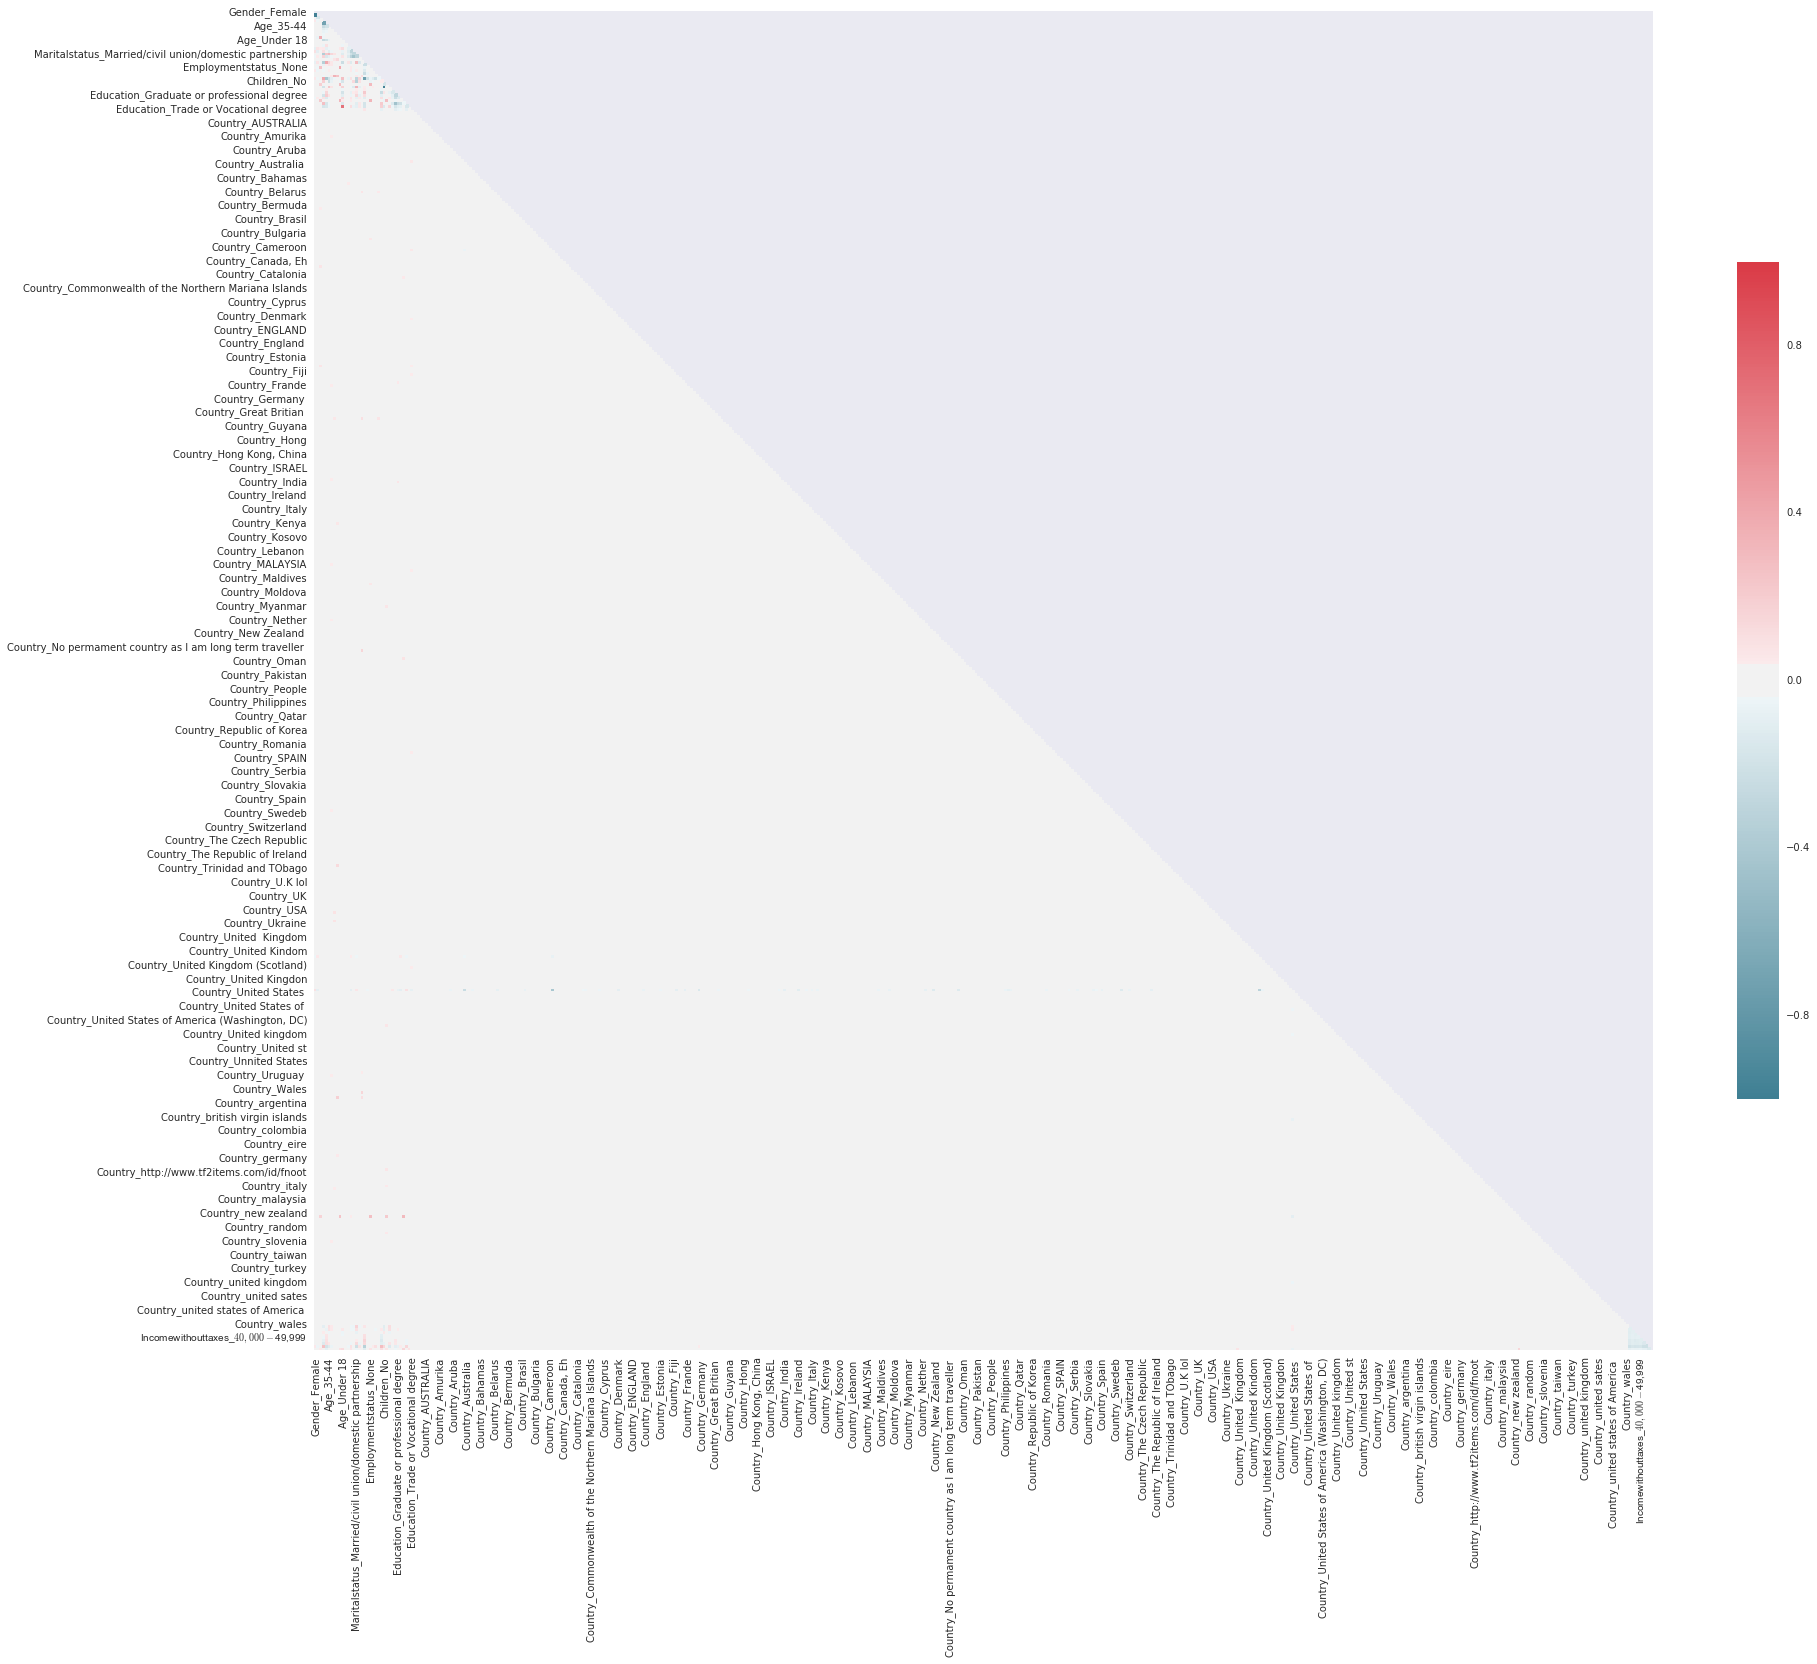

In [96]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
Corr = X.corr(method='pearson', min_periods=1)
f, ax = plt.subplots(figsize=(30, 30))

# Generate a mask for the upper triangle
mask = np.zeros_like(Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Corr, square=True,cmap=cmap, xticklabels=5, yticklabels=5,mask=mask,
            linewidths=0, cbar_kws={"shrink": .5}, ax=ax)


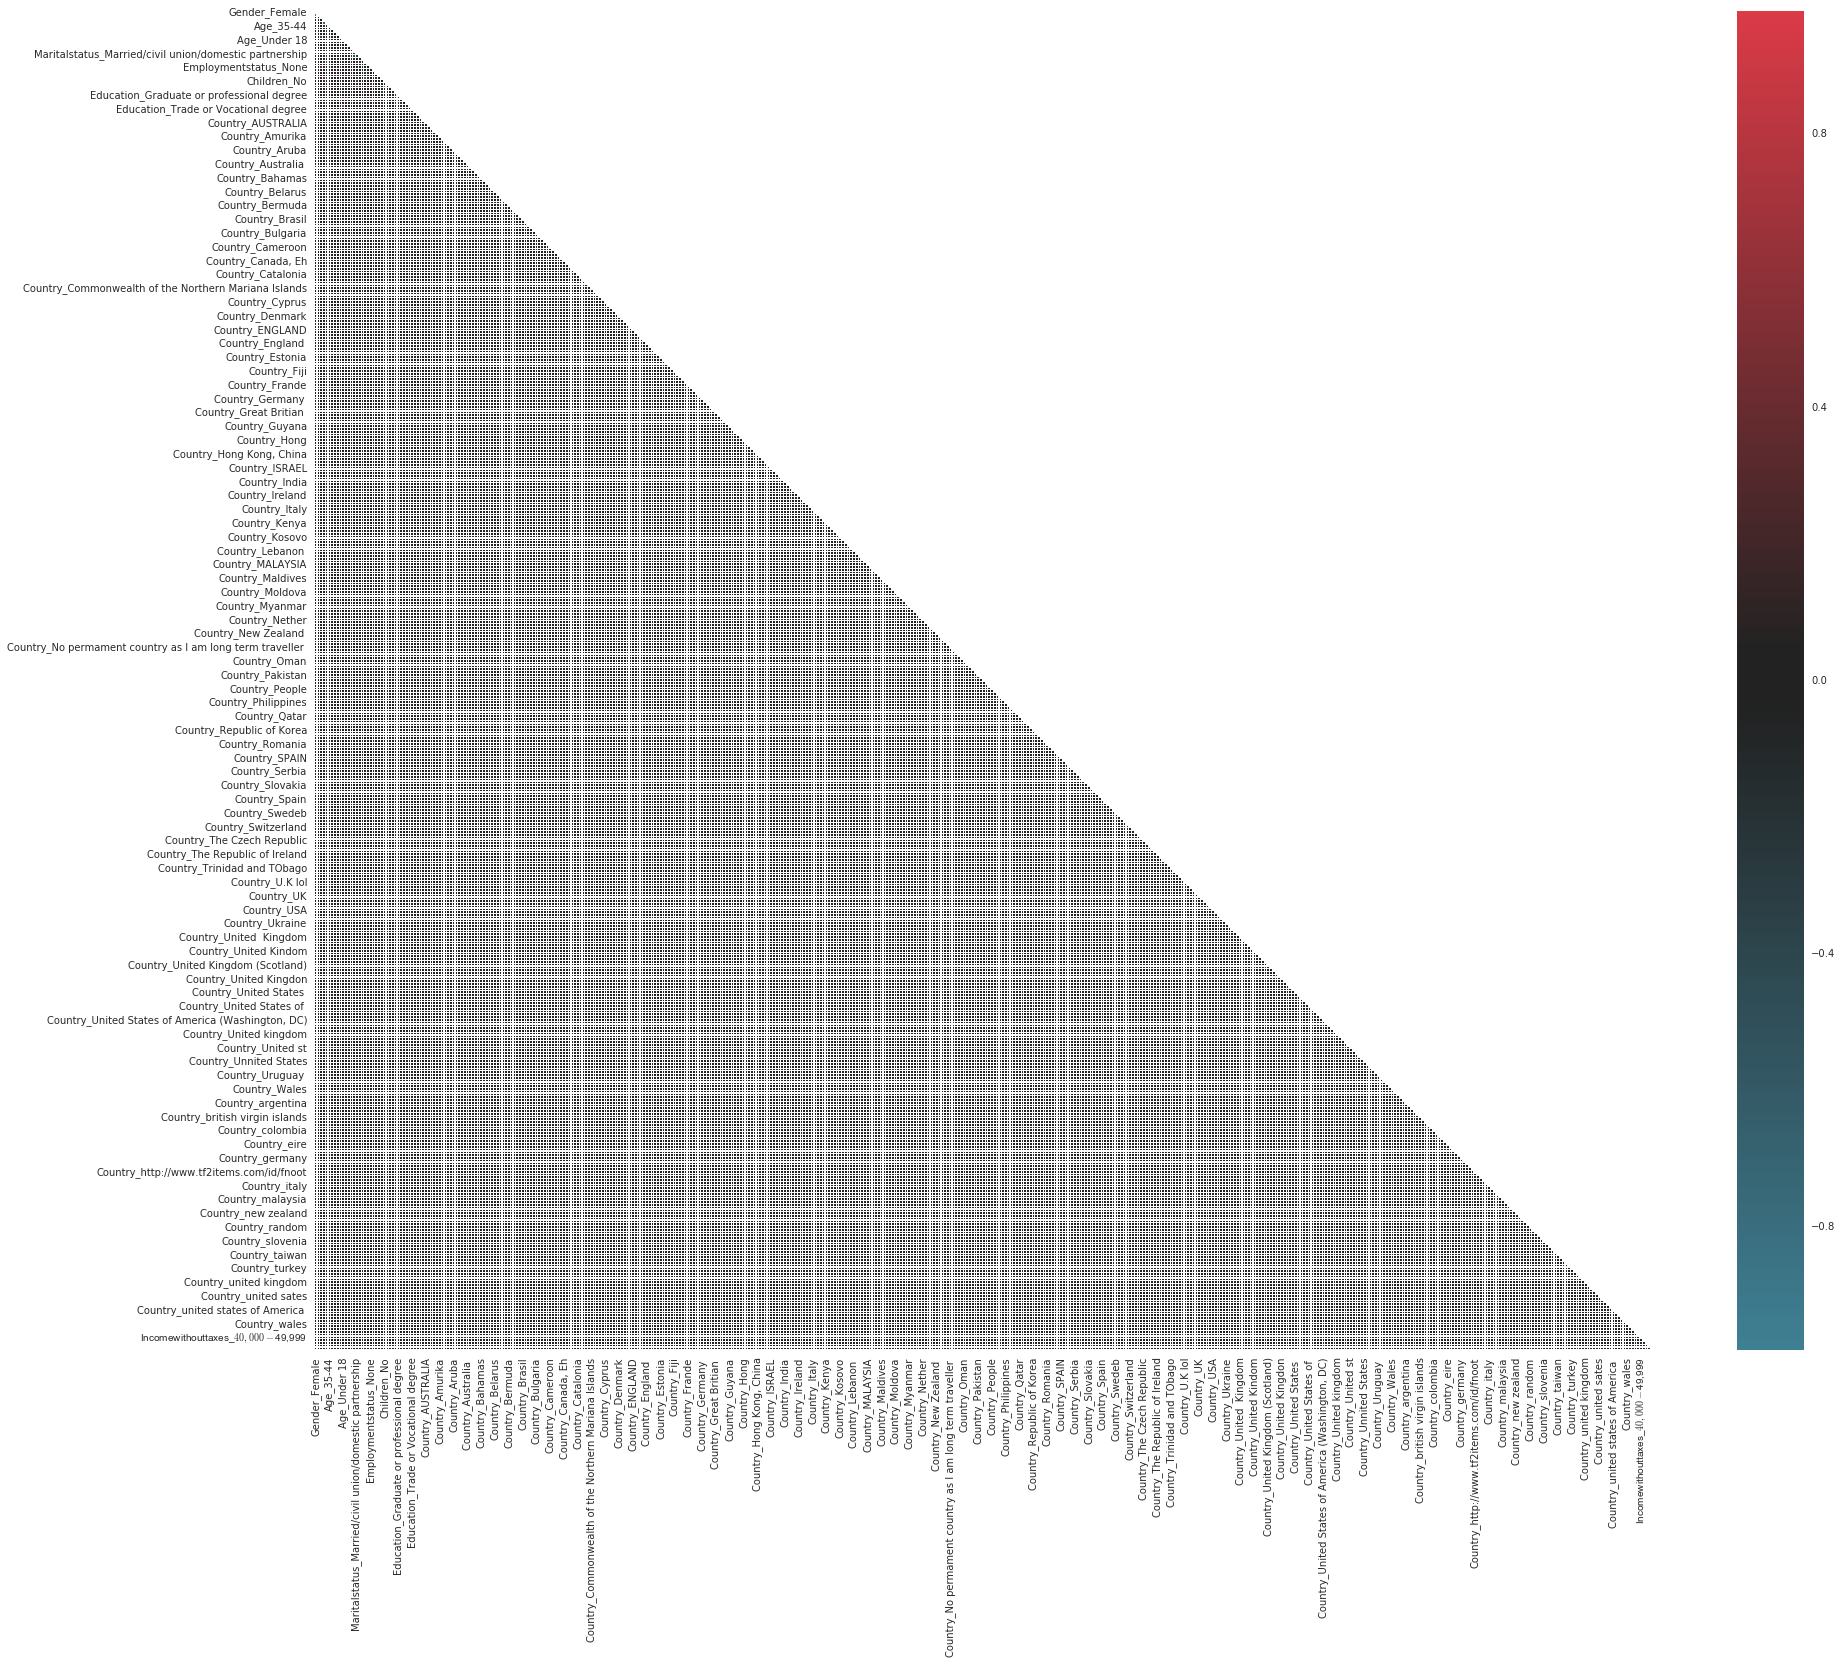

In [97]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                # columns=list(letters[:26]))

# Compute the correlation matrix
Corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center="dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, cbar=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.10, cbar_kws={"shrink": .8}, ax=ax)

==>Implementing Random Forest

In [196]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [197]:
y.value_counts()

No      30521
Yes      2223
none        5
Name: Militarystatus, dtype: int64

In [198]:
y_train.value_counts()

No      21367
Yes      1553
none        4
Name: Militarystatus, dtype: int64

In [199]:
y_test.value_counts()

No      9154
Yes      670
none       1
Name: Militarystatus, dtype: int64

In [200]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [201]:
model.oob_score_

0.93007328563950442

It is a good model ,we got 93% accuracy

In [202]:
prediction=model.predict(X_test)


==>Implementing Confusion Metrics

In [203]:
y_predict=model.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)


array([[9072,   82,    0],
       [ 596,   74,    0],
       [   0,    0,    1]])

In [204]:
pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,none,All
True,,,,
No,9072,82,0,9154
Yes,596,74,0,670
none,0,0,1,1
All,9668,156,1,9825


==>Classification Report

In [205]:
from sklearn.metrics import classification_report
print classification_report(model.predict(X_test), y_test)

             precision    recall  f1-score   support

         No       0.99      0.94      0.96      9668
        Yes       0.11      0.47      0.18       156
       none       1.00      1.00      1.00         1

avg / total       0.98      0.93      0.95      9825



==>Feature_Important

In [106]:

model.feature_importances_

array([  1.15669840e-02,   1.21044224e-02,   6.31893405e-03,
         1.62293155e-02,   1.96603857e-02,   1.37083054e-02,
         7.36646761e-03,   4.84797830e-03,   3.07315180e-03,
         5.53938878e-03,   6.33119974e-03,   3.45143554e-03,
         1.02366139e-02,   2.49570335e-02,   2.47130096e-02,
         1.98435923e-02,   2.64871212e-02,   3.06283736e-03,
         2.37273302e-02,   1.60137138e-02,   1.93678943e-02,
         7.99217998e-03,   1.07881210e-02,   4.31097157e-03,
         1.98714529e-02,   1.56057339e-02,   6.51716875e-03,
         1.45030784e-02,   1.29584736e-02,   2.66663930e-02,
         2.47097697e-02,   2.11153224e-02,   5.46142494e-03,
         2.92523392e-02,   7.99628139e-03,   1.00497210e-02,
         3.35179333e-06,   3.17511142e-05,   0.00000000e+00,
         3.53636955e-05,   1.37317563e-03,   1.13070738e-05,
         1.79406326e-05,   2.13062115e-06,   1.24846790e-06,
         8.15434501e-06,   0.00000000e+00,   3.14384918e-06,
         9.66278160e-06,

C:\Users\anusha\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


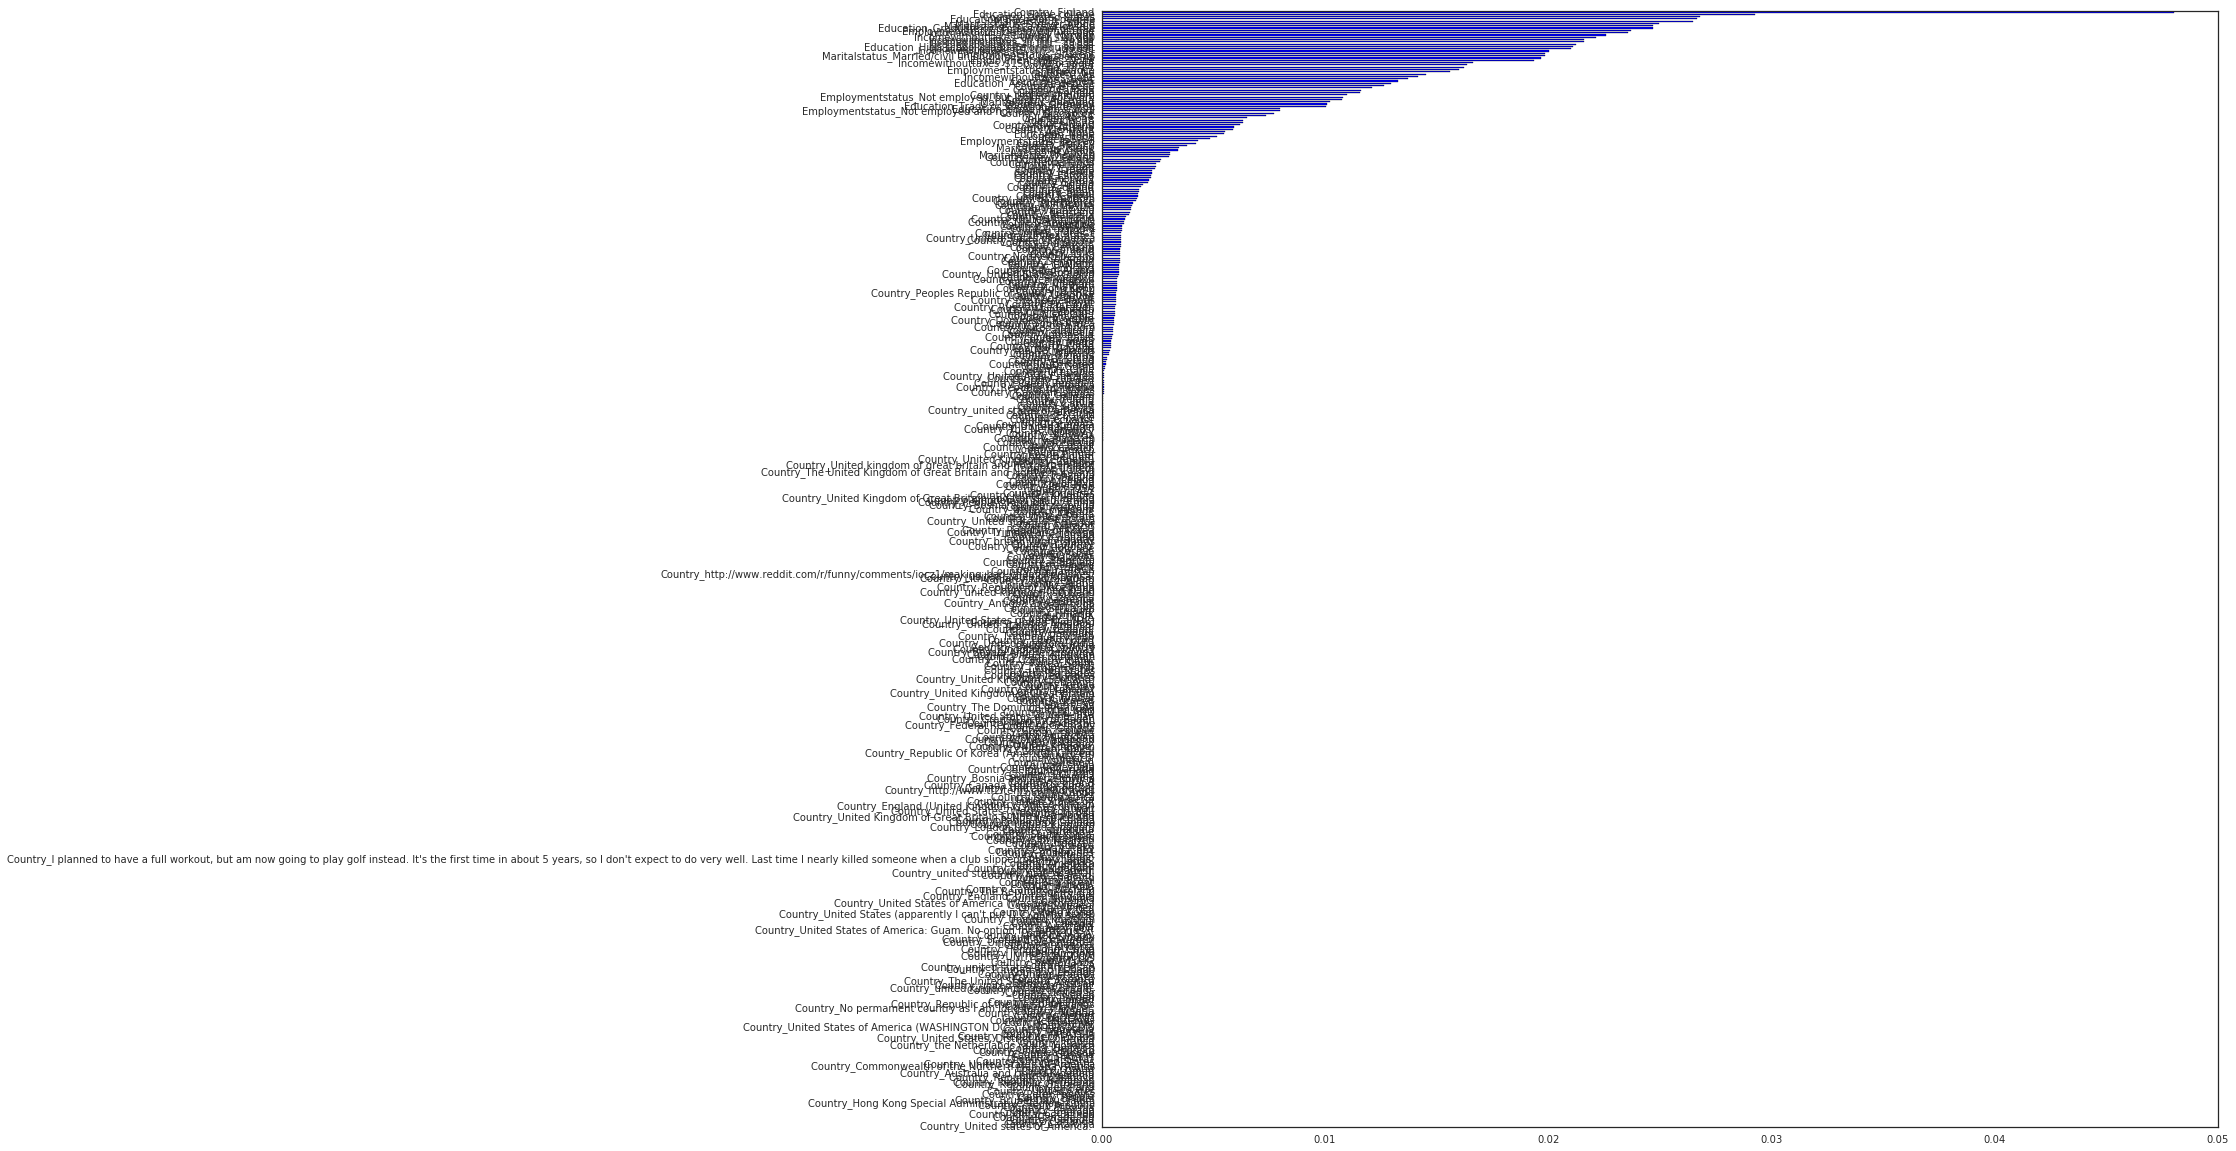

In [107]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,20));

### n_jobs

In [ ]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train, y_train)

In [ ]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

1 loops, best of 3: 1min 10s per loop


Here when we assign n_jobs=-1 it taking less tim than n_jobs=1,so lets us consider n_jobs=-1

###n_estimator_options

In [109]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print trees, "trees"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)
   

30 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]
50 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]
100 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]
200 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]
500 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]
1000 trees
Confusionmatrix  [[9055   85    0]
 [ 603   81    0]
 [   0    0    1]]


Here it is not making any difference so we can take any value of estimator,let us consider estimator as 100

###max_features_options

In [ ]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print max_features, "option"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)
    


### min_samples_leaf

In [214]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print min_samples, "min samples"
    Matrix = confusion_matrix(y_true, y_predict)

    print "Confusionmatrix ", Matrix
    results.append(Matrix)
    

1 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
2 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
3 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
4 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
5 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
6 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
7 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
8 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
9 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]
10 min samples
Confusionmatrix  [[9154    0    0]
 [ 660   10    0]
 [   1    0    0]]


==>Final Implementation

In [215]:
model = RandomForestClassifier(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [208]:
model.oob_score_

0.93351945559239224

In [209]:
y_predict=model.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)


array([[9154,    0,    0],
       [ 660,   10,    0],
       [   1,    0,    0]])

In [212]:
pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
True,,,
No,9154,0,9154
Yes,660,10,670
none,1,0,1
All,9815,10,9825


So,from the above,we should conclude first predicted model is the best model_score 93%